Preparing the notebook for using matplotlib and numpy.

In [1]:
#%matplotlib inline # this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib widget 
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt

# Let printing work the same in Python 2 and 3
from __future__ import print_function, division

# notice two underscores _ either side of future



## PH2150-  Scientific Computing and Employabilty Skills

### Python-Ordinary Differential Equations ODEs (week 10)

### Dr. Andrew Casey  (a.casey@rhul.ac.uk, W054)

Physical laws are expressed as mathematical relations which can then be solved under boundary condition constraints.


Consider for example the relationship between electric and magnetic fields as represented by *Maxwell's equations*:

$$ \nabla \times E = -\frac{\partial B}{\partial t}; \nabla \times B = \mu_{0}J+\mu_{0}\epsilon_{0}\frac{\partial E}{\partial t};\nabla\cdot B = 0$$

In order to find out, for example, the field distribution inside a resonator cavity, we need to solve these equations by applying suitable boundary conditions dictated by the geometry of the cavity and electromagnetic properties of the material used for making it. For *simple* geometries, analytic solutions are possible but in most cases numerical methods are essential and that is one reason why computers are important for physics. In this weeks exercise we will be looking at some of the numerical tools available to solve these equations.

**Ordinary Differential Equations:** A differential equation is any equation which contains derivatives, either ordinary derivatives or partial derivatives. Up to this point practically every differential equation that you have been presented with could be solved. The problem with this is that these are the exceptions rather than the rule. We need numerical techniques to solve them

In this lecture we are going to look at some simple methods to solve ordinary differential equations ( i.e. not *partial differential* equations) and build up to using the tools that are contained within the *scipy.integrate* package.

**Notation** We will often use shorthand notation for time derivatives where  $$\dot{x}=\frac{dx}{dt}$$ and $$\ddot{x}=\frac{d^{2}x}{dt^{2}}.$$  

In other words, the number of dots indicates the number of derivatives. Since we'll be finding the value of a function $x(t)$ at discrete values of $t$, we can label those times with integer subscripts as $t_{1} =t_{0} +\Delta t,t_{2} =t_{0} +2\cdot\Delta t ,\ldots,t_{i} =t_{0} +i\cdot\Delta t ,$ where $t_{0}$ is the initial time and $\Delta t$ is the time interval between the subsequent solutions.

We will label the values of the function as, $x_{0} = x(t_{0}), x_{1}=x(t_{0}+\Delta t),\ldots,x_{i}=x(t_{0}+i\cdot\Delta t) $.

Similarly, the notation for derivatives is $\dot{x}_{i}=\dot{x}(t_{i})$  and  $\ddot{x}_{i}= \ddot{x}(t_{i})$.

The form of the second-order differential equations is:
$$\frac{d^{2}x}{dt^{2}}=f(x,\frac{dx}{dt} ,t )$$ or 
		$$\ddot{x}=f(x,\dot{x},t)$$
		
  where the initial values of the function $x_{0}$ and first derivative $\dot{x}_{0}$ are known at the initial time $t_{0}$.
We want to find the function at later times. 






## Euler Method

The simplest numerical method to solve differential equations is the *Euler Method*. If time is divided into small steps $\Delta t$, then:

\begin{equation}\label{1} \dot{x}(t)\approx \frac{x(t+\Delta t)-x(t)}{\Delta t} \tag{1} \end{equation}

and
\begin{equation}\label{2} \ddot{x}(t)\approx \frac{\dot{x}(t+\Delta t)-\dot{x}(t)}{\Delta t} \tag{2}\end{equation}

Suppose that the solution is known at one time. Rearranging equation $\eqref{1}$, the approximate solution after a step forward in time is:

$$x(t+\Delta t)\approx x(t)+\dot{x}(t)\Delta t$$

To find the solution at another step forward in time will require knowing the first derivative at that later time. According to equation $\eqref{2}$, that derivative is approximately:

$$\dot{x}(t+\Delta t)\approx \dot{x}(t)+\ddot{x}(t)\Delta t,$$

$$x_{n+1}\approx x_n + \dot{x_n}\Delta t$$

where we use $\ddot{x}_{i}=f(x_{i},\dot{x}_{i},t_{i})$. These final two equations can be used iteratively to find the approximate solution at later times. 

Unfortunately, this method is not very accurate after a while.
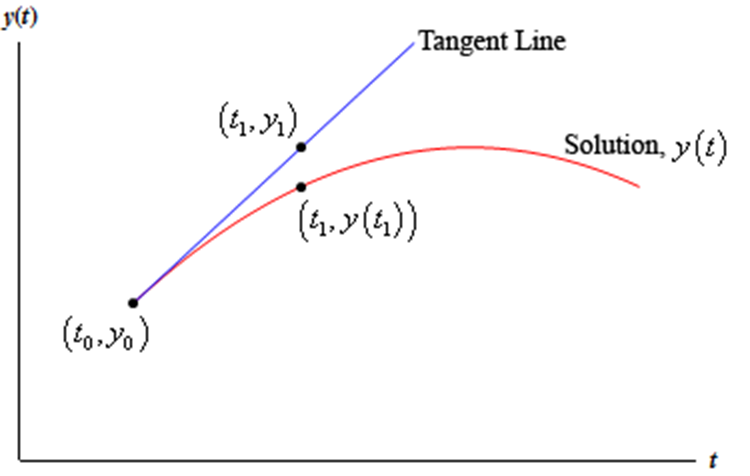
**Figure:** A time step using the Euler Method.

## Euler-Cromer Method

A simple modification to the method described above greatly improves the accuracy of the numerical solution. First, find the approximate first derivative after a step forward in time as before, 

\begin{equation}\label{3} \dot{x}(t+\Delta t)\approx \dot{x}(t)+\ddot{x}(t)\Delta t \tag{3} \end{equation}

Next, the value of the function at a later time is approximated by:

\begin{equation}\label{4} x(t+\Delta t)\approx x(t)+\dot{x}(t+\Delta t)\Delta t \tag{4}\end{equation}

where the approximate first derivative at this later time is used.

**Note:** the slight difference between this approach and the Euler Method. The *previous* value of  $\ddot{x}$ (which may depend on the *previous* values of $x$ and $\dot{x}$ at the *previous* time) is used to calculate a new value of $\dot{x}$. However, the *new* value of  $\dot{x}$ is used to calculate the new value of $x$. 


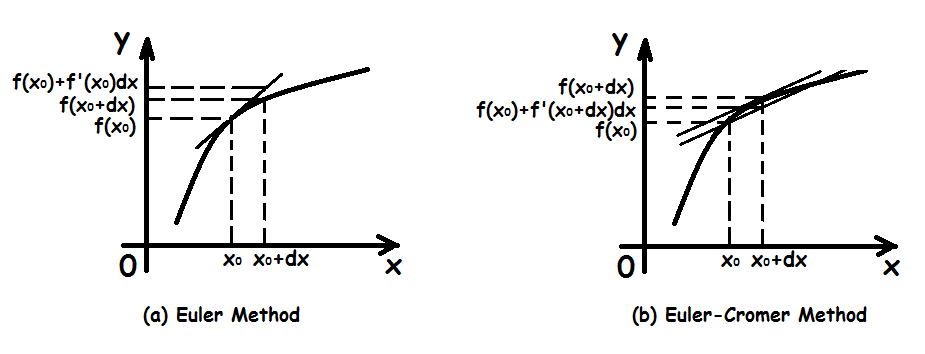
**Figure:** Comparison of Euler and Euler-Cromer Method

The Euler (or Euler-Cromer) method is a first-order method, which means that the local error (error per step) is proportional to the square of the step size $\mathcal{O}(h^2)$, and the global error (error at a given time) is proportional to the step size. This means that it is not very good (sometimes use as a predictor to get starting conditions but not used in anger to solve any scientific problems, for that higher order methods are used such as the *Runge-Kutta 4*, **RK4** method.

## Runge-Kutta 4:


$$t_{n+1} = t_n + h$$

$$x_{n+1} = x_n + (1/6)(k_1 + 2k_2 + 2k_3 + k_4)$$

where
$$h=\Delta t$$

$$k_1 = h f(t_n, x_n)$$

$$k_2 = h f(t_n + h/2, x_n + k_1/2)$$

$$k_3 = h f(t_n + h/2, x_n + k_2/2)$$

$$k_4 = h f(t_n + h, x_n + k_3)$$
* $k_{1}$ is the slope at the beginning of the interval, using $x_n$ (Euler's method);
* $k_{2}$ is the slope at the midpoint of the interval, using  $x_n$ and $k_{1}$;
* $k_{3}$ is again the slope at the midpoint, but now using $x_n$ and $k_{2}$;
* $k_{4}$ is the slope at the end of the interval, using $x_n$ and $k_{3}$.

The **RK4** method is a fourth-order method, meaning that the local truncation error is on the order of $\mathcal{O}(h^5)$, while the total accumulated error is on the order of $\mathcal{O}(h^4)$.

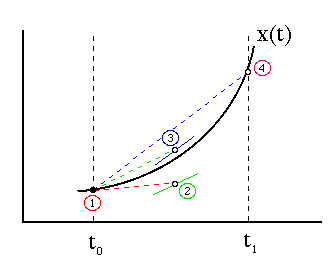

**Figure:** Runge-Kutta 4 requires you to evaluate the gradient at 4 points shown in this figure.

## scipy.integrate ODE functions

The scipy.integrate library has two powerful routines, ode and odeint, for numerically solving systems of coupled first order ordinary differential equations (ODEs).
 
**ode** is more versatile
**odeint** (ODE integrator) has a simpler *Python* interface works very well for most problems. 


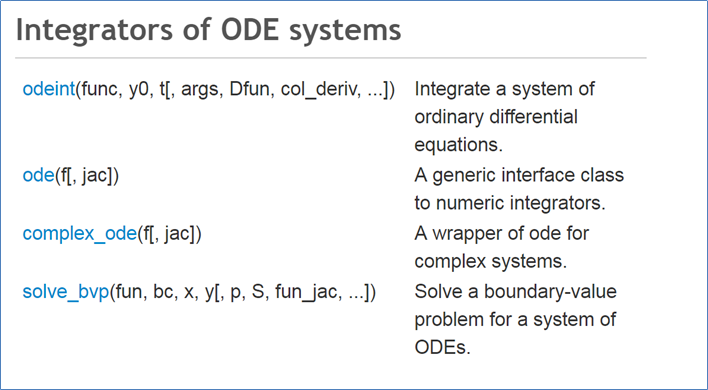

In [2]:
from scipy.integrate import odeint
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

*odeint* (func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    
    Integrate a system of ordinary differential equations.
      
      Parameters
    ----------
    func : callable(y, t, ...) or callable(t, y, ...)
        Computes the derivative of y at t.
        If the signature is ``callable(t, y, ...)``, then the argument
        `tfirst` must be set ``True``.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y. The initial
        value point should be the first element of this sequence.
        This sequence must be monotonically increasing or monotonically
        decreasing; repeated values are allowed.
    args : tuple, optional
        Extra arguments to pass to function.

### ODE Example

A typical problem is to solve a second or higher order ODE for a given set of initial conditions. 
For example the equation for a driven damped pendulum The equation of motion for the angle $\theta$ that the pendulum makes with the vertical is given by:

$$\frac{d^{2}\theta}{dt^{2}}= -\frac{1}{Q}\frac{d\theta}{dt}+\sin\theta+ d\cos\Omega t$$


Where $t$ is time, $Q$ is the qulaity factor , $d$ is the forcing amplitude and $\Omega$ is the driving frequency.

The ODE is nonlinear owing to the $\sin\theta$ term. Reduced varaibles have been used such that the natural frequency is 1.

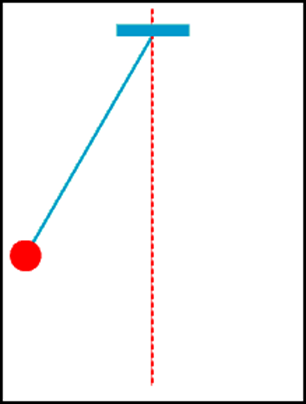




### Procedure for solving:

The first step is always to transform any $n$ th-order ODE into a system of $n$ first order ODEs of the form:

$$\frac{dy_1}{dt}= f_1(t,y_1,...,y_n)$$

$$\vdots = \vdots$$

$$\frac{dy_n}{dt}= f_n(t,y_1,...,y_n)$$

We also need $n$ initial conditions, one for each variable $y_i$. Here we have a second order ODE so we will have two coupled ODEs and two initial conditions.
We start by transforming our second order ODE into two coupled first order ODEs. The transformation is easily accomplished by defining a new variable $\omega=\frac{d\theta}{dt}$. With this definition, we can rewrite our second order ODE as two coupled first order ODEs:

$$\frac{d\theta}{dt}=\omega$$
$$\frac{d\omega}{dt}=-\frac{1}{Q}\omega+\sin\theta + d\cos\Omega t$$

Therefore are two coupled first order ODE's are:

$$f_1(t,\theta,\omega)=\omega$$
$$f_2(t,\theta,\omega)=-\frac{1}{Q}\omega+\sin\theta + d\cos\Omega t$$

Note that there are no explicit derivatives on the right hand side of the functions $f_i$; they are all functions of $t$ and the various $y_i$, in this case $\theta$ and $\omega$.
The initial conditions specify the values of $\theta$ and $\omega$ at $t=0$.

SciPy’s ODE solver scipy.integrate.odeint has three required arguments plus optional keyword arguments, we will use one, *args*, for this example

So in this case, *odeint* has the form *odeint*(func, y0, t, args=())

* The first argument *func* is the name of a Python function that returns a list of values of the *n* functions $f_i(t, y1, ..., yn)$ at a given time $t$.
* The second argument $y0$ is an array (or list) of the values of the initial conditions of (y1, ..., yn).
* The third argument is the array of times at which you want odeint to return the values of y1, ..., yn).
* The keyword argument args is a tuple that is used to pass parameters (besides y0 and t) that are needed to evaluate func. 


After having written the nth-order ODE as a system of n first-order ODEs, the next task is to write the function *func*. The function *func* should have three arguments:

* the list (or array) of current *y* values, 
* the current time *t*, 
* and a list of any other parameters *params* needed to evaluate func. 

The function *func* returns the values of the derivatives dyi/dt = fi(t, y1, ..., yn) in a list (or array). 

The only other tasks remaining are to define the parameters needed in the function, bundling them into a list , and to define the initial conditions (in another list)
After defining the time array, the only remaining task is to call odeint with the appropriate arguments and a variable, psol in this case to store output. 

The output *psol* is an *n* element array where each element is itself an array corresponding the values of $y_i$ for each time in the time $t$ array that was an argument of odeint.

For this example:
* The first element psol[:,0] is the $y_0$ or theta array,
* The second element psol[:,1] is the $y_1$ or omega array.
* The rest of the code simply plots out the results in different formats. The resulting plots are shown in the following figure.


In [3]:
# Week 10 ODE example using scipy.integrate.odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(y,t,params): # In this example the parameters Q,d and OmegaD have been combined into a list
    """ The function that returns a list of n functions to be solved by the ODE"""
    theta,omega=y # unpacks currrent values
    Q,d,OmegaD=params # unpacks parameters
    deriv=[omega,-omega/Q+np.sin(theta)+d*np.cos(OmegaD*t)] # list of dy/dt=f functions
    return deriv

def func1(y,t,Q,d,OmegaD): # In this example the parameters Q,d and OmegaD have been left as individual parameters
    """ The function that returns a list of n functions to be solved by the ODE"""
    theta,omega=y # unpacks currrent values
    deriv=[omega,-omega/Q+np.sin(theta)+d*np.cos(OmegaD*t)] # list of dy/dt=f functions
    return deriv

#Initial Parameters
Q=2# Quality factor
d=1.5 # Drive amplitude
OmegaD=0.65 # Drive frequency
params=[Q,d,OmegaD] # bundle into single variable
#Inital Values
theta0=0.0
omega0=0.0
y0=[theta0,omega0]#bundle initial values
tinc=0.05
tstop=200
t=np.arange(0.,tstop,tinc)

#call the ODE solver
psol=odeint(func,y0,t,args=(params,)) # note 
#psol=odeint(func1,y0,t,args=(Q,d,OmegaD))

fig=plt.figure()
ax1=fig.add_subplot(311)
ax1.plot(t,psol[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('theta')

ax2=fig.add_subplot(312)
ax2.plot(t,psol[:,1], color='green')
ax2.set_xlabel('Time')
ax2.set_ylabel('omega')

ax3=fig.add_subplot(313)
ax3.plot(psol[:,0]%(2*np.pi),psol[:,1],'.',ms=1, color='C4')
ax3.set_xlabel('Theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0,2*np.pi)
fig.suptitle('Pendulum trajectory')
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …